In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import requests
from io import StringIO
import pickle

In [49]:
# Ho importato gli url dei csv attraverso la libreria Request
df1= 'https://raw.githubusercontent.com/MatteoCostamagna/Prova/main/Andamento-occupazione-del-settore-della-pesca-per-regione.csv'
df2= 'https://raw.githubusercontent.com/MatteoCostamagna/Prova/main/Importanza-economica-del-settore-della-pesca-per-regione.csv'
df3= 'https://raw.githubusercontent.com/MatteoCostamagna/Prova/main/Produttivita-del-settore-della-pesca-per-regione.csv'

# Ho definito le GET per avere i dati
response_pesca1 = requests.get(df1)
response_pesca2 = requests.get(df2)
response_pesca3 = requests.get(df3)

# Controllo se le GET hanno restituito i dati richiesti
df = pd.read_csv(StringIO(response_pesca1.text), sep=';')
df2 = pd.read_csv(StringIO(response_pesca2.text), sep=';')
df3 = pd.read_csv(StringIO(response_pesca3.text), sep=';')

display(df)
display(df2)
display(df3)


print(df2.columns)
print(df3.columns)

,Anno,Regione,Variazione percentuale unit� di lavoro della pesca
0,2001,Piemonte,11.89
1,2001,Valle d'Aosta,200.00
2,2001,Lombardia,162.04
3,2001,Trentino-Alto Adige,-0.67
4,2001,Veneto,-2.67
...,...,...,...
235,2012,Puglia,-1.26
236,2012,Basilicata,-17.24
237,2012,Calabria,-12.13
238,2012,Sicilia,-0.79


,Anno,Regione,Percentuale valore aggiunto pesca-piscicoltura-servizi
0,2000,Piemonte,0.01
1,2000,Valle d'Aosta,0.01
2,2000,Lombardia,0.01
3,2000,Trentino-Alto Adige,0.02
4,2000,Veneto,0.16
...,...,...,...
235,2011,Puglia,0.40
236,2011,Basilicata,0.01
237,2011,Calabria,0.13
238,2011,Sicilia,0.36


,Anno,Regione,Produttivit� in migliaia di euro
0,2000,Piemonte,59.2180
1,2000,Valle d'Aosta,372.0144
2,2000,Lombardia,119.4304
3,2000,Trentino-Alto Adige,43.3656
4,2000,Veneto,24.3476
...,...,...,...
235,2011,Puglia,27.0511
236,2011,Basilicata,48.3853
237,2011,Calabria,27.9066
238,2011,Sicilia,12.7831


Index(['Anno', 'Regione',
       'Percentuale valore aggiunto pesca-piscicoltura-servizi'],
      dtype='object')
Index(['Anno', 'Regione', 'Produttivit� in migliaia di euro'], dtype='object')


In [50]:
#uniamo tutto in un unico file all'inizio rinominiamo le colonne poiche hanno nnomi strani
df2.rename(columns={'Percentuale valore aggiunto pesca-piscicoltura-servizi': 'PercValAggPesca'}, inplace=True)
df3.rename(columns={'Produttivit� in migliaia di euro': 'ProdInMiglEur'}, inplace=True)
df.rename(columns={'Variazione percentuale unit� di lavoro della pesca': 'PercVarUnitLavoroPesca'}, inplace=True)

#controllo che i nomi siano cmabiati
print(df.columns)
print(df2.columns)
print(df3.columns)

# Definisci le liste delle regioni per ogni posizione
nord_ovest = ['Valle d\'Aosta', 'Piemonte', 'Liguria', 'Lombardia']
nord_est = ['Trentino-Alto Adige', 'Veneto', 'Friuli-Venezia Giulia', 'Emilia-Romagna']
centro = ['Toscana', 'Umbria', 'Marche', 'Lazio', 'Abruzzo']
sud = ['Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria']
isole = ['Sicilia', 'Sardegna']

# Funzione per determinare la posizione
def get_posizione(regione):
    if regione in nord_ovest:
        return 'Nord-ovest'
    elif regione in nord_est:
        return 'Nord-est'
    elif regione in centro:
        return 'Centro'
    elif regione in sud:
        return 'Sud'
    elif regione in isole:
        return 'Isole'
    else:
        return 'Sconosciuta'  # Opzionale: per gestire eventuali regioni non elencate


df['PercValAggPesca'] = df2['PercValAggPesca']
df['ProdInMiglEur'] = df3['ProdInMiglEur']
# Applica la funzione alla colonna 'Regione' per creare la nuova colonna 'Posizione'
df['Posizione'] = df['Regione'].apply(get_posizione)

# Salva il dataframe aggiornato in un nuovo file CSV
df.to_csv('regioni_con_posizione.csv', index=False)

# Visualizza il dataframe aggiornato
display(df)


Index(['Anno', 'Regione', 'PercVarUnitLavoroPesca'], dtype='object')
Index(['Anno', 'Regione', 'PercValAggPesca'], dtype='object')
Index(['Anno', 'Regione', 'ProdInMiglEur'], dtype='object')


,Anno,Regione,PercVarUnitLavoroPesca,PercValAggPesca,ProdInMiglEur,Posizione
0,2001,Piemonte,11.89,0.01,59.2180,Nord-ovest
1,2001,Valle d'Aosta,200.00,0.01,372.0144,Nord-ovest
2,2001,Lombardia,162.04,0.01,119.4304,Nord-ovest
3,2001,Trentino-Alto Adige,-0.67,0.02,43.3656,Nord-est
4,2001,Veneto,-2.67,0.16,24.3476,Nord-est
...,...,...,...,...,...,...
235,2012,Puglia,-1.26,0.40,27.0511,Sud
236,2012,Basilicata,-17.24,0.01,48.3853,Sud
237,2012,Calabria,-12.13,0.13,27.9066,Sud
238,2012,Sicilia,-0.79,0.36,12.7831,Isole


In [51]:
# normalizzazione del csv

# df.isnull().sum()

# ricerca ed eliminazione dei valori vuoti con media dei valori
from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')


for column in df:
 if df[column].isnull().values.any():
  tmp = df[column].to_numpy().reshape(-1, 1)  # Reshaping to 2D array
  # Imputation of missing values
  df[column] = imp_mean.fit_transform(tmp).ravel()


df.isnull().sum()

Anno                      0
Regione                   0
PercVarUnitLavoroPesca    0
PercValAggPesca           0
ProdInMiglEur             0
Posizione                 0
dtype: int64

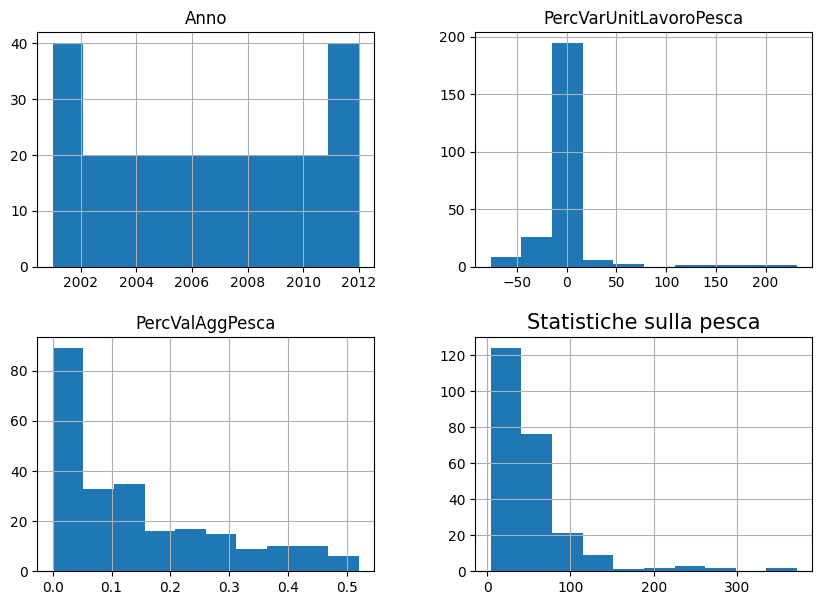

In [52]:


df.hist(figsize=(10,7))
plt.xlabel("")
plt.ylabel("")
plt.title("Statistiche sulla pesca", fontsize=15)
plt.show()

In [53]:
display(df.describe())


,Anno,PercVarUnitLavoroPesca,PercValAggPesca,ProdInMiglEur
count,240.000000,240.000000,240.000000,240.000000
mean,2006.500000,-1.077042,0.142833,55.323963
std,3.459267,28.448774,0.138984,51.947116
min,2001.000000,-76.340000,0.000000,4.306200
25%,2003.750000,-8.972500,0.020000,27.629825
50%,2006.500000,-1.640000,0.100000,40.035800
75%,2009.250000,4.575000,0.220000,60.370975
max,2012.000000,231.580000,0.520000,372.014400


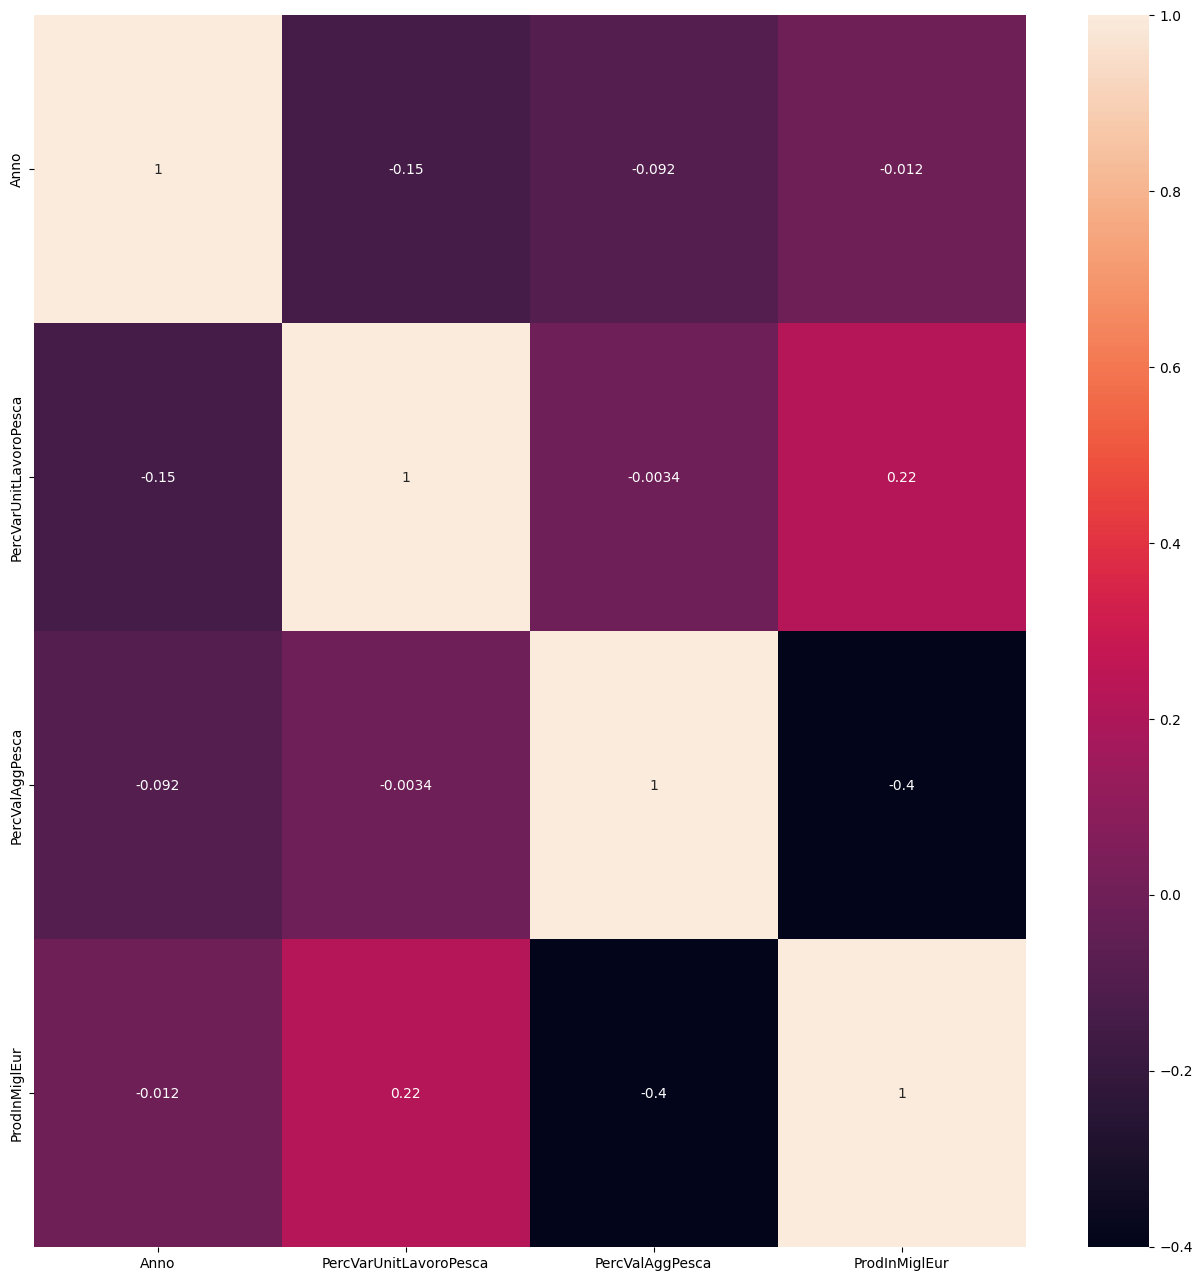

In [54]:
# Correlation matrix
# Filtra solo le colonne numeriche
df_numerico = df.select_dtypes(include=[np.number])

corr_matrix = df_numerico.corr()

# plot
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [55]:
# Ho salvato il file in questa cartella
df.to_csv('regioni_con_posizione.csv', index=False)

In [56]:

# E che abbia colonne 'Anno', 'Area', 'Produttività' e 'Valore aggiunto pesca piscicoltura', 'Occupazione'

# Filtrare per anno
produttività_per_area = df.groupby(['Anno', 'Posizione'])['ProdInMiglEur'].sum() / 1000
produttività_per_area = produttività_per_area.reset_index()

print(produttività_per_area)


    Anno   Posizione  ProdInMiglEur
0   2001      Centro       0.271942
1   2001       Isole       0.075130
2   2001    Nord-est       0.182548
3   2001  Nord-ovest       0.588675
4   2001         Sud       0.281633
5   2002      Centro       0.191071
6   2002       Isole       0.058128
7   2002    Nord-est       0.179067
8   2002  Nord-ovest       0.259159
9   2002         Sud       0.204859
10  2003      Centro       0.221737
11  2003       Isole       0.049737
12  2003    Nord-est       0.147950
13  2003  Nord-ovest       0.523452
14  2003         Sud       0.234387
15  2004      Centro       0.255780
16  2004       Isole       0.055954
17  2004    Nord-est       0.152078
18  2004  Nord-ovest       0.518118
19  2004         Sud       0.254725
20  2005      Centro       0.215487
21  2005       Isole       0.051909
22  2005    Nord-est       0.129466
23  2005  Nord-ovest       0.399313
24  2005         Sud       0.235614
25  2006      Centro       0.213531
26  2006       Isole       0

In [57]:
produttività_nazionale = df.groupby('Anno')['ProdInMiglEur'].sum() / 1000
produttività_nazionale = produttività_nazionale.reset_index()

print(produttività_nazionale)


    Anno  ProdInMiglEur
0   2001       1.399928
1   2002       0.892284
2   2003       1.177263
3   2004       1.236656
4   2005       1.031789
5   2006       1.032220
6   2007       0.993572
7   2008       1.031226
8   2009       0.899520
9   2010       1.148050
10  2011       1.236156
11  2012       1.199086


In [58]:
media_valore_aggiunto_per_area = df.groupby(['Anno', 'Posizione'])['PercValAggPesca'].mean()
media_valore_aggiunto_per_area = media_valore_aggiunto_per_area.reset_index()

print(media_valore_aggiunto_per_area)


    Anno   Posizione  PercValAggPesca
0   2001      Centro           0.1580
1   2001       Isole           0.3250
2   2001    Nord-est           0.1475
3   2001  Nord-ovest           0.0350
4   2001         Sud           0.1820
5   2002      Centro           0.1520
6   2002       Isole           0.3300
7   2002    Nord-est           0.1350
8   2002  Nord-ovest           0.0400
9   2002         Sud           0.1720
10  2003      Centro           0.1580
11  2003       Isole           0.3850
12  2003    Nord-est           0.1200
13  2003  Nord-ovest           0.0425
14  2003         Sud           0.2000
15  2004      Centro           0.1600
16  2004       Isole           0.4150
17  2004    Nord-est           0.1250
18  2004  Nord-ovest           0.0475
19  2004         Sud           0.1880
20  2005      Centro           0.1340
21  2005       Isole           0.4250
22  2005    Nord-est           0.1125
23  2005  Nord-ovest           0.0475
24  2005         Sud           0.1760
25  2006    

In [59]:
df['Occupazione shift'] = df.groupby('Anno')['PercVarUnitLavoroPesca'].shift(1)
df['Variazione percentuale occupazione'] = ((df['PercVarUnitLavoroPesca'] - df['Occupazione shift']) / df['Occupazione shift']) * 100

variazione_percentuale_nazionale = df.groupby('Anno')['PercVarUnitLavoroPesca'].mean().reset_index()

print(variazione_percentuale_nazionale)


    Anno  PercVarUnitLavoroPesca
0   2001                 29.1630
1   2002                -12.0130
2   2003                -11.4955
3   2004                  1.2600
4   2005                 -4.0230
5   2006                 16.2660
6   2007                  2.2400
7   2008                -13.5240
8   2009                 -3.3595
9   2010                 -8.1545
10  2011                 -6.0850
11  2012                 -3.1990


In [60]:
variazione_percentuale_per_area = df.groupby(['Anno', 'Posizione'])['PercVarUnitLavoroPesca'].mean().reset_index()

print(variazione_percentuale_per_area)


    Anno   Posizione  PercVarUnitLavoroPesca
0   2001      Centro                 18.9380
1   2001       Isole                 -3.5200
2   2001    Nord-est                  3.1825
3   2001  Nord-ovest                 92.7775
4   2001         Sud                 22.3540
5   2002      Centro                -10.4780
6   2002       Isole                  3.5250
7   2002    Nord-est                 -5.0300
8   2002  Nord-ovest                -33.4350
9   2002         Sud                 -8.2120
10  2003      Centro                -17.6500
11  2003       Isole                 -3.8050
12  2003    Nord-est                -10.7925
13  2003  Nord-ovest                -13.4275
14  2003         Sud                 -7.4340
15  2004      Centro                  0.0460
16  2004       Isole                  6.1250
17  2004    Nord-est                  1.1675
18  2004  Nord-ovest                  2.1425
19  2004         Sud                 -0.1040
20  2005      Centro                 -1.2480
21  2005  

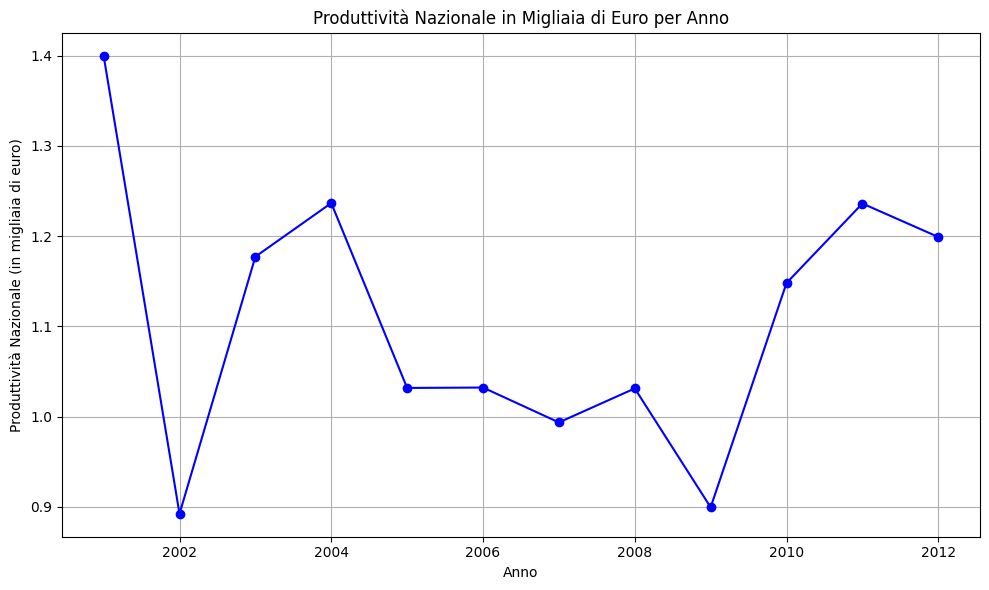

In [63]:


# Plot della serie calcolata
plt.figure(figsize=(10, 6))
plt.plot(produttività_nazionale['Anno'], produttività_nazionale['ProdInMiglEur'], marker='o', linestyle='-', color='b')
plt.title('Produttività Nazionale in Migliaia di Euro per Anno')
plt.xlabel('Anno')
plt.ylabel('Produttività Nazionale (in migliaia di euro)')
plt.grid(True)
plt.tight_layout()

# Mostra il plot
plt.show()

